In [1]:
!pip install kaggle

     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.7 kB ? eta -:--:--
     --------- ---------------------------- 20.5/82.7 kB 162.5 kB/s eta 0:00:01
     --------- ---------------------------- 20.5/82.7 kB 162.5 kB/s eta 0:00:01
     ------------------ ------------------- 41.0/82.7 kB 245.8 kB/s eta 0:00:01
     -------------------------------------- 82.7/82.7 kB 421.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105795 sha256=6946f402f59d49c5e8667d81b23b1b2ed97429135d564a79b276733a63add7c8
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\46\d2\26\84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle


In [28]:
# Installing xlrd 2.0.1 to read the excel from the Kaggle API
pip install xlrd>=2.0.1

Note: you may need to restart the kernel to use updated packages.


In [31]:
# Importing a Titanic dataset using the Kaggle API
# Code for the Kaggle API 
""" import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Initialize the Kaggle API
api = KaggleApi()
api.authenticate()

# Download the dataset
dataset_name = 'vinicius150987/titanic3'
api.dataset_download_files(dataset_name, path='.', unzip=True)

# Check the downloaded files
os.listdir('.') """

Dataset URL: https://www.kaggle.com/datasets/vinicius150987/titanic3


['-',
 '.anaconda',
 '.conda',
 '.condarc',
 '.continuum',
 '.gitconfig',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.kaggle',
 '.matplotlib',
 '.node_repl_history',
 '.vscode',
 '2.0.1',
 '3D Objects',
 'anaconda3',
 'AppData',
 'Application Data',
 'Bulldozer',
 'car-sales.csv',
 'Contacts',
 'Cookies',
 'Data',
 'Data_Wrangling_Project_Starter.ipynb',
 'Desktop',
 'Documents',
 'Downloads',
 'FantasyFootball.ipynb',
 'FantasyFootball2.ipynb',
 'FantasyFootball3.ipynb',
 'Favorites',
 'Images',
 'IntelGraphicsProfiles',
 'kaggle.json',
 'Links',
 'Local Settings',
 'matplot.ipynb',
 'milestone.ipynb',
 'milestone2.ipynb',
 'Models',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TM.blf',
 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TMContainer00000000000000000002.regtrans-ms',
 

### Problem Statement: Reviewing the Titanic and the Estonia Datasets
The main objective of this project is to examine both the datasets provided for the Titanic and the Estonia, and determine the following questions: 
1. Which crash was considered to be worse based factors that will be determined in the analysis.
2. What was the mean age and gender for survival and death.
3. Which ship had a better survival rate (broken down by passengers, crew, and both passengers & crew together).
4. I will examine my survival rate for each ship, and determine which ship I had a greater chance of survival.
5. Did the wealthier passengers on the Titanic have a better chance of survival than the regular passengers and the crew members?
6. Was it true that the women and children took priority for the lifeboats?
7. What was the breakdown of the elderly by gender that survived?

In [1001]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import pickle

## Dataset 1
Type: (Excel File)

Method: (Downloaded file through the Kaggle API.)

Dataset variables:

1. Variable 1 - pclass: The passenger class sorted by 1st, 2nd, and 3rd class (1st class being the best.
2. Variable 2 - survived: 1 if the passenger survived and 0 if the passenger died. 
3. Variable 3 - name: The name of the passenger on board the Titanic.
4. Variable 4 - sex: The documented gender of each passenger.
5. Variable 5 - age: The documented age of each passenger.
6. Variable 6 - sibsp: The number of Siblings or Spouses that were on the ship related to a specific passenger.
7. Variable 7 - parch: The number of Parents or Children onboard the ship related to a specific passenger.
8. Variable 8 - ticket: The ticket number that the passenger needed to board the ship.
9. Variable 9 - fare: The amount of money the passenger paid for the ticket.
10. Variable 10 - cabin: The cabin number.
11. Variable 11 - embarked: The location the passenger embarked from (C = Cherbourg, O = Others, Q = Queenstown, S = Southhampton.
12. Variable 12 - boat: The Lifeboat Number
13. Variable 13 - body: The Body Identification Number of a specific passenger.
14. Variable 14 - home.dest: The passenger home/destination.

    **The Titanic dataset was extracted from Kaggle's API as seen in the code notes above. This is the complete Titanic passenger dataset and has not been cleaned. I chose the Titanic dataset because it is a tragic analysis of the people who lived or died in the crash. We can get a better understanding of the social-economic factors that played a role in the survival rate, and further understand how much of a risk it really was just to travel across continents 100 years ago. The important variables for this dataset will be survival, sex, age, pclass, and ticket price. These variables will help explain if it was true that females and childrens were first on the lifeboats and if wealthy men had a better survival rate than working class or middle class men on board. These variables will also help explain the main questions asked above like survival rate based on average age and gender for survival.**

In [6]:
# Using pd.read_excel to create a datafile for the titanic passenger excel file.
df_titanic = pd.read_excel('titanic3.xls', engine='xlrd')
df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Dataset 2
Type: (CSV File.)

Method: (Manual Upload for a CSV File.)

Dataset variables:

1. Variable 1 - PassengerID: The ID of each passenger/crewmember.
2. Variable 2 - Country: The country the passenger/crew was from.
3. Variable 3 - Firstname: First Name of the passenger/crew.
4. Variable 4 - Lastname: Last Name of the passenerger/crew.
5. Variable 5 - Sex: Gender of a specific passenger.
6. Variable 6 - Age: Age of a specific passenger.
7. Variable 7 - Category: P for Passenger, C for Crew
8. Variable 8 - Survived: 1 if the passenger survived, 0 if the passenger.

   **The Estonia's Shipwreck dataset was downloaded from Kaggle and manually uploaded to this Jupyter notebook. The Estonia was a cruiseferry and the sinking occurred in 1994 in the Baltic, and the reason for the sinking is still unknown according to online resources. 852 people died due to the sinking, which makes it the 2nd deadliest European maritime disaster with the Titanic being the 1st deadliest. The Estonia wreck is a stark reminder that even though technology has advanced substantially since the sinking of the Titanic, ships and ferries can still wreck/sink in modern times and cause substantial deaths. This dataset is essentially clean, however I will combine the first and last names into a separate column and change the Survived answers from 0 or 1 to Yes and No. The important variables in this dataset are the Sex, Age, Category, and Survived columns. These columns will help compare and contrast with the Titanic dataset and will answer the questions I have put forward.**

In [9]:
# Retrieving the estonia dataset with pd.read_csv.
df_estonia = pd.read_csv('estonia-passenger-list.csv')
df_estonia.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


## Dataset 3
Type: Titanic Passenger and Crew Full List (CSV File)

Method: (Programmatically unzipped the data.)

Dataset variables:

1. Variable 1 - name: The name of the passenger on board the Titanic.
2. Variable 2 - sex/gender: The documented gender of each passenger survived: 1 if the passenger survived and 0 if the passenger died. 
3. Variable 3 - age: The documented age of each passenger.
4. Variable 4 - pclass/class: The passenger class sorted by 1st, 2nd, and 3rd class (1st class being the best. embarked: The location the passenger embarked from (C = Cherbourg, O = Others, Q = Queenstown, S = Southhampton.
5. Variable 5 - embarked: The location the passenger embarked from (C = Cherbourg, O = Others, Q = Queenstown, S = Southhampton. country: Country of the passenger/crewmember.
6. Variable 6 - country: Country of the passenger/crewmember. ticket: The ticket number that the passenger needed to board the ship.
7. Variable 7 - ticket: The ticket number that the passenger needed to board the ship. parch: The number of Parents or Children onboard the ship related to a specific passenger.
8. Variable 8 - fare: The amount of money the passenger paid for the ticket.
9. Variable 9 - sibsp: The number of Siblings or Spouses that were on the ship related to a specific passenger.
10. Variable 10 - parch: The number of Parents or Children onboard the ship related to a specific passenger.
11. Variable 11 - survived: The location the passenger embarked from (C = Cherbourg, O = Others, Q = Queenstown, S = Southhampton.

    **This Titanic dataset includes both the crew and the passenger list and was programmatically unzipped after being found from the Kaggle website. This dataset is needed to help compare between the Estonia and the Titanic wrecks/sinking for our analysis. The first Titanic dataset provided only includes the passenger list, while this Titanic dataset includes both the passenger and the crew list similar to the Estonia dataset. Now I can complete an analysis for passengers only, crew only, and passenger & crew combined.**

In [21]:
# Code used to unzip the titanic & crew member dataset.
''' import zipfile

with zipfile.ZipFile("titanicpassandcrew.zip","r") as zip_ref:
    zip_ref.extractall("Data") '''

' import zipfile\n\nwith zipfile.ZipFile("titanicpassandcrew.zip","r") as zip_ref:\n    zip_ref.extractall("Data") '

In [12]:
# Unzipped the zip file and ran pd.read_csv to read the titanic passenger & crew dataset
# When loading the data, you could remove the Data/ and just put 'titanic.csv' if you don't to add the file to a data folder.
df_titanic_combined = pd.read_csv('Data/titanic.csv')
df_titanic_combined.head()

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0.0,0.0,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0.0,2.0,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,1.0,1.0,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1.0,1.0,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,0.0,0.0,yes


## Analysis Section: 

### Quality Issue 1: Titanic Passenger Data

**Inspecting the dataframe visually: Using the .head(), .info(), and .describe() methods to see the issues that might arise with the data:**
    
    1. The Age column is missing 263 values. I need to determine what to do with these missing values.
    
    2. Survived should be changed from 0 to 1 to survived or died for better readability.
    
    3. Looking at .head(), the unknown values are reported as NaN which is the correct classification for missing values. I will check if there 0 values as well. I will check the missing variable in the following columns: 'fare', 'cabin', 'embarked', 'boat', 'body', and 'home.dest' to see if they have blanks, 0's, or NaN.

**Inspecting the dataframe visually with .head() shows that there are NAN values mostly for the boat and body columns.**

In [18]:
df_titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [20]:
# The .info method is showing all of the non-null values in the columns. 
# The cabin, boat, and body columns are the predominant vcolumns with non-null values.
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [22]:
# Provides an analytical snapshot of the passenger titanic data.
# This can help later in determining what to use for missing values in the analysis.
df_titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [24]:
# Showing the unique values in the dataset
df_titanic.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        939
fare          281
cabin         186
embarked        3
boat           28
body          121
home.dest     369
dtype: int64

### Inspecting the Titanic passenger dataframe programmatically:

In [27]:
print(df_titanic.isnull().sum())

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


**Using the combination of the methods .isnull() & .sum() shows the results of all of the NaN values in the following columns 'age', 'fare', 'cabin', 'embarked', 'boat', 'body', and 'home.dest'. It looks like the only relevant values to resolve the NaN values would be in the 'age' & 'fare' column.**

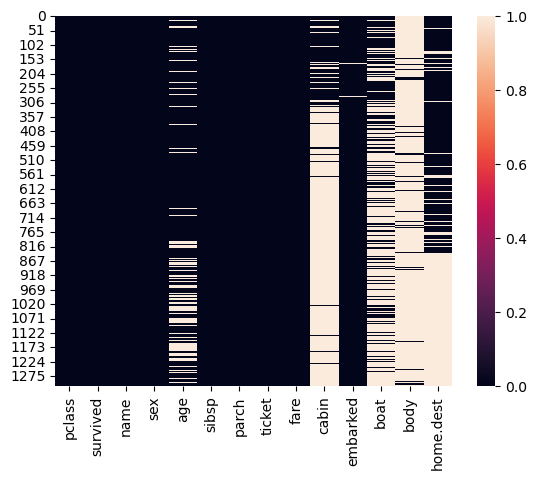

In [30]:
sns.heatmap(df_titanic.isna());

**The Seaborn heat map paints a clearer picture of the missing NaN values that could not be determined or provided in the records this dataset was taken from.**

In [33]:
null_embarked = df_titanic["embarked"].isnull()
df_titanic[null_embarked]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


**Using the .isnull() method and searching at only the 'embarked' column confirms that there are two rows with NaN values. Since this column is a string in a Panda object type, I will leave it as is because selecting one of the 3 choices provided would just be guessing and would not be relevant information for the analysis.**

In [36]:
null_fare = df_titanic["fare"].isnull()
df_titanic[null_fare]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN


**Since there is one fare that is NaN, I will replace that with the fare mean which is 33.29 in the cleaning section.**

In [39]:
columns_with_zeros = (df_titanic == 0).any()
print(columns_with_zeros[columns_with_zeros == True])

survived    True
sibsp       True
parch       True
fare        True
dtype: bool


In [41]:
zero_counts = (df_titanic == 0).sum()
zero_counts

pclass          0
survived      809
name            0
sex             0
age             0
sibsp         891
parch        1002
ticket          0
fare           17
cabin           0
embarked        0
boat            0
body            0
home.dest       0
dtype: int64

***Checking for 0s in the datasets and determining what to do with these 0s. There are 17 fares with 0. The rest of these columns with 0s are appropriate since the 0s are meant to be there. Either 17 fares were free tickets or there was a mistake inputting these values.***

In [43]:
fares_zeros = df_titanic[df_titanic['fare'] == 0]
fares_zeros

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,NaN,NaN,"Belfast, NI"
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S,NaN,NaN,"Liverpool, England / Belfast"
125,1,0,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S,NaN,NaN,NaN
150,1,0,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,NaN,110.0,NaN
170,1,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,C,NaN,Liverpool
223,1,0,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,NaN,NaN,Belfast
234,1,0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,NaN,NaN,"Rotterdam, Netherlands"
363,2,0,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,NaN,NaN,Belfast
384,2,0,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,NaN,NaN,Belfast
410,2,0,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,NaN,NaN,Belfast


In [851]:
age_zeros = df_titanic[df_titanic['age'] == 0]
age_zeros

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [853]:
sex_zeros = df_titanic[df_titanic['sex'] == 0]
sex_zeros

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


### Quality Issue 2: Estonia Crash Dataset
**Inspecting the dataframe visually: Using the .head(), .info(), and .describe() methods the issues that arise with the data are:**

    1. For better readability, the survived column should be changed from 0 and 1 to Yes or No.
    
    2. Checking for any NaN or 0 values in the dataset or any inaccuracies that might be found in the dataset.

In [46]:
df_estonia.head(10)

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0
5,6,Sweden,GERD INGA MAGNHILD,AHLSTROM,F,71,P,0
6,7,Sweden,HJALMAR,AHLSTROM,M,60,P,0
7,8,Estonia,PILLE,AHMAN,F,18,P,0
8,9,Estonia,TORMI,AINSALU,M,30,C,0
9,10,Sweden,ANNA MARIA,ALDRIN,F,63,P,0


**Visually, the data looks clean with no NaN values.**

In [48]:
df_estonia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Country      989 non-null    object
 2   Firstname    989 non-null    object
 3   Lastname     989 non-null    object
 4   Sex          989 non-null    object
 5   Age          989 non-null    int64 
 6   Category     989 non-null    object
 7   Survived     989 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 61.9+ KB


**The .info method shows that there are no NaN values in the Estonia dataset.**

In [50]:
# .describe providing an analytical snapshot of the Estonia dataset.
df_estonia.describe()

,PassengerId,Age,Survived
count,989.000000,989.000000,989.000000
mean,494.992922,44.575329,0.138524
std,285.643660,17.235146,0.345624
min,1.000000,0.000000,0.000000
25%,248.000000,30.000000,0.000000
50%,495.000000,44.000000,0.000000
75%,742.000000,59.000000,0.000000
max,989.000000,87.000000,1.000000


### Inspecting the Estonia dataframe programmatically: 
1. Using the isnull and sum methods proves there are 0 NaN values.
2. The heatmap shows there are no NaN values as well.

In [53]:
print(df_estonia.isnull().sum())

PassengerId    0
Country        0
Firstname      0
Lastname       0
Sex            0
Age            0
Category       0
Survived       0
dtype: int64


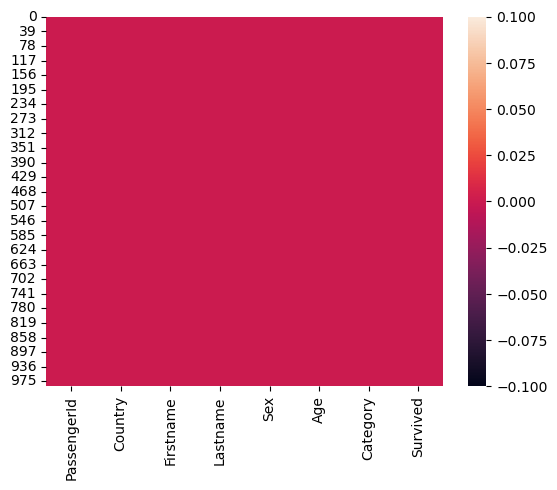

In [55]:
sns.heatmap(df_estonia.isna());

In [55]:
df_estonia.nunique()

PassengerId    987
Country         16
Firstname      849
Lastname       774
Sex              2
Age             78
Category         2
Survived         2
dtype: int64

In [847]:
age_zeros = df_estonia[df_estonia['Age'] == 0]
age_zeros

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
969,970,Estonia,KATRE,ZELMIN,F,0,P,0


**One of the female passengers has an age of 0. I will fill the mean age value for that row.**

In [849]:
sex_zeros = df_estonia[df_estonia['Sex'] == 0]
sex_zeros

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived


### Quality Issue 3: Titanic Combined Dataset - 
**Inspecting the dataframe visually: Using the .head(), .info(), and .describe() methods the issues that arise with the data are:**
1. For better readability, the class column should be copied to another column called category showing just either passenger or crewmember like the Estonia dataset.
2. Checking for any NaN or 0 values in the dataset that would affect an analysis or any inaccuracies that might be found in the dataset.

**Visually, there are no NaN values in the combined passenger & crewmember Titanic dataset.**

In [803]:
df_titanic_combined.head(10)

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.1100,0.0,0.0,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.0500,0.0,2.0,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.0500,1.0,1.0,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1.0,1.0,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.1300,0.0,0.0,yes
5,"Abelseth, Mr. Olaus Jørgensen",male,25.0,3rd,S,United States,348122.0,7.1300,0.0,0.0,yes
6,"Abelson, Mr. Samuel",male,30.0,2nd,C,France,3381.0,24.0000,1.0,0.0,no
7,"Abelson, Mrs. Hannah",female,28.0,2nd,C,France,3381.0,24.0000,1.0,0.0,yes
8,"Abī-Al-Munà, Mr. Nāsīf Qāsim",male,27.0,3rd,C,Lebanon,2699.0,18.1509,0.0,0.0,yes
9,"Abrahamsson, Mr. Abraham August Johannes",male,20.0,3rd,S,Finland,3101284.0,7.1806,0.0,0.0,yes


In [806]:
# The .info method is showing all of the non-null values in the columns. 
# The ticketno, fare, sibsp, & parch columns are the predominant columns with non-null values.
df_titanic_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      2207 non-null   object 
 1   gender    2207 non-null   object 
 2   age       2205 non-null   float64
 3   class     2207 non-null   object 
 4   embarked  2207 non-null   object 
 5   country   2126 non-null   object 
 6   ticketno  1316 non-null   float64
 7   fare      1291 non-null   float64
 8   sibsp     1307 non-null   float64
 9   parch     1307 non-null   float64
 10  survived  2207 non-null   object 
dtypes: float64(5), object(6)
memory usage: 189.8+ KB


In [66]:
# .describe providing an analytical snapshot of the combined Titanic passenger & crewmember dataset.
df_titanic_combined.describe()

,age,ticketno,fare,sibsp,parch
count,2205.000000,1.316000e+03,1291.000000,1307.000000,1307.000000
mean,30.444444,2.842157e+05,33.404760,0.499617,0.385616
std,12.151764,6.334726e+05,52.227592,1.042273,0.866092
min,0.166667,2.000000e+00,3.030500,0.000000,0.000000
25%,22.000000,1.426225e+04,7.180600,0.000000,0.000000
50%,29.000000,1.114265e+05,14.090200,0.000000,0.000000
75%,38.000000,3.470770e+05,31.060750,1.000000,0.000000
max,74.000000,3.101317e+06,512.060700,8.000000,9.000000


### Inspecting the Combined Titanic dataframe programmatically:

In [69]:
print(df_titanic_combined.isnull().sum())

name          0
gender        0
age           2
class         0
embarked      0
country      81
ticketno    891
fare        916
sibsp       900
parch       900
survived      0
dtype: int64


**Using the isnull and sum methods show that the age has two NaN values. The columns with NaN values 'country', 'sibsp', 'parch' will be left the as is since this is just unknowable information. The columns 'fare' & 'ticketno' most likely are NaN because the crew did not need fare or ticket numbers. I will check if this assertion is correct or not.**

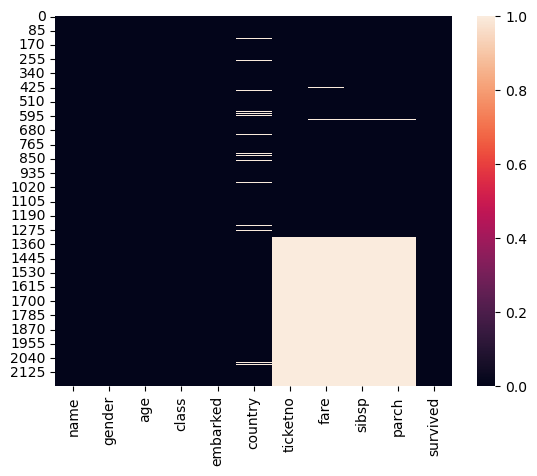

In [72]:
sns.heatmap(df_titanic_combined.isna());

**The Seaborn heat map paints a clearer picture of the missing NaN values that could not be determined or provided in the records this dataset was taken from.**

In [74]:
df_titanic_combined.nunique()

name        2202
gender         2
age           79
class          7
embarked       4
country       48
ticketno     924
fare         276
sibsp          7
parch          8
survived       2
dtype: int64

In [76]:
null_age = df_titanic_combined["age"].isnull()
df_titanic_combined[null_age]

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
439,"Gheorgheff, Mr. Stanio",male,NaN,3rd,C,Bulgaria,349254.0,7.1711,0.0,0.0,no
677,"Kraeff, Mr. Theodor",male,NaN,3rd,C,Bulgaria,349253.0,7.1711,0.0,0.0,no


**There are two rows with NaN values. The mean of the ages will replace these values in the cleaning phase.**

In [79]:
df_titanic_combined['class'].value_counts()

class
3rd                 709
victualling crew    431
1st                 324
engineering crew    324
2nd                 284
restaurant staff     69
deck crew            66
Name: count, dtype: int64

**The value_counts() method shows the breakdown of the passenger and the crew/staff. However, it would be helpful to have another column showing just the breakdown of the passengers and crew like the Estonia ship data.**

In [855]:
age_zeros = df_titanic_combined[df_titanic_combined['age'] == 0]
age_zeros

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived


In [859]:
fares_zeros = df_titanic_combined[df_titanic_combined['fare'] == 0]
fares_zeros

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived


### Tidiness Issue 1: 
**Put Yes or No for Survived or Died instead of 0 or 1 for both the Titanic Passenger and the Estonia Datasets.**

In [861]:
df_titanic.tail(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.875,NaN,S,NaN,NaN,NaN


In [863]:
df_estonia.tail(1)

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
988,989,Sweden,CARL,OVBERG,M,42,P,1


### Tidiness Issue 2: 
**The combined Titanic dataset should have a column like the Estonia dataset just showing whether the person on board is a passenger or crew member. For the purpose of this exercise, the restaurant staff will be inlcuded as crew members.**

In [865]:
df_titanic_combined.tail(1)

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
2206,"Zarracchi, Sig. L.",male,26.0,restaurant staff,S,England,NaN,NaN,NaN,NaN,no


In [92]:
df_titanic_combined['fare'].isnull().sum()

916

**There are 916 fare rows with NaN values, but lets examine where these NaN values are at. Searching through the 1st, 2nd, 3rd classes there are 26 NaN values. The rest of the NaN values will be in the crew/staff section which did not need a fare.**

In [95]:
determine_fares = df_titanic_combined[(df_titanic_combined['class'] == '1st') | 
    (df_titanic_combined['class'] == '2nd') | 
    (df_titanic_combined['class'] == '3rd')]['fare'].isnull().sum()
determine_fares

26

## 3. Cleaning the Datasets

**Making copies of the cleaned data, so there is both a raw dataset and a cleaned dataset.**

In [99]:
df_cleaned_titanic = df_titanic.copy()
df_cleaned_estonia = df_estonia.copy()
df_cleaned_titaniccombined = df_titanic_combined.copy()

### Data Quality Issue 1 Process - Titanic Passenger & Estonia Dataset
**Below the age column in the copy of the titanic passenger data is being edited. The NaN values are being replaced with the mean of the dataset for a more thorough analysis. The 0 is also being replaced with the mean age in the Estonia cleaned dataset as well. The .fillna and the .replace methods had to be used to clean up the dataset for the data analysis to work later on.**

In [102]:
# Replace NaN with the mean of the ages
df_cleaned_titanic['age'] = df_cleaned_titanic['age'].fillna((df_cleaned_titanic['age'].mean()))

In [869]:
df_cleaned_titanic['age'].isnull().sum()

0

In [946]:
# Replace 0s with the mean of the ages in the Estonia cleaned dataset
mean_age_estonia = df_cleaned_estonia[df_cleaned_estonia['Age'] != 0]['Age'].mean()
df_cleaned_estonia['Age'] = df_cleaned_estonia['Age'].replace(0, mean_age_estonia)

In [948]:
age_zeros = df_cleaned_estonia[df_cleaned_estonia['Age'] == 0]
age_zeros

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived,Fullname,ship


### Data Quality Issue 2 Process - Titanic Passenger Dataset
**Below the fare column in the copy of the titanic passenger data is being edited. The NaN value is being replaced with the mean of the fare in the dataset, so that a more thorough analysis can be made.**

In [107]:

df_cleaned_titanic['fare'] = df_cleaned_titanic['fare'].fillna((df_cleaned_titanic['fare'].mean()))

In [109]:
df_cleaned_titanic['fare'].isnull().sum()

0

**Now the fares need to be corrected that were listed as zero and changed to the fare mean.**

In [843]:
fares_zeros = df_cleaned_titanic[df_cleaned_titanic['fare'] == 0]
fares_zeros

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
7,1,No,"Andrews, Mr. Thomas Jr",male,39.000000,0,0,112050,0.0,A36,S,NaN,"Belfast, NI"
70,1,No,"Chisholm, Mr. Roderick Robert Crispin",male,29.881135,0,0,112051,0.0,NaN,S,NaN,"Liverpool, England / Belfast"
125,1,No,"Fry, Mr. Richard",male,29.881135,0,0,112058,0.0,B102,S,NaN,NaN
150,1,No,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B94,S,NaN,NaN
170,1,Yes,"Ismay, Mr. Joseph Bruce",male,49.000000,0,0,112058,0.0,B52 B54 B56,S,C,Liverpool
223,1,No,"Parr, Mr. William Henry Marsh",male,29.881135,0,0,112052,0.0,NaN,S,NaN,Belfast
234,1,No,"Reuchlin, Jonkheer. John George",male,38.000000,0,0,19972,0.0,NaN,S,NaN,"Rotterdam, Netherlands"
363,2,No,"Campbell, Mr. William",male,29.881135,0,0,239853,0.0,NaN,S,NaN,Belfast
384,2,No,"Cunningham, Mr. Alfred Fleming",male,29.881135,0,0,239853,0.0,NaN,S,NaN,Belfast
410,2,No,"Frost, Mr. Anthony Wood ""Archie""",male,29.881135,0,0,239854,0.0,NaN,S,NaN,Belfast


In [871]:
# Replace 0s with the mean of the fares
mean_fare = df_cleaned_titanic[df_cleaned_titanic['fare'] != 0]['fare'].mean()
df_cleaned_titanic['fare'] = df_cleaned_titanic['fare'].replace(0, mean_fare)

In [873]:
fares_zeros = df_cleaned_titanic[df_cleaned_titanic['fare'] == 0]
fares_zeros

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest


### Data Quality Issue 3 Process - Combined Titanic Dataset
**There are two ages in the combined titanic dataset that are NaN. The mean of the ages of the dataset will be replaced in these two rows.**

In [112]:

df_cleaned_titaniccombined['age'] = df_cleaned_titaniccombined['age'].fillna((df_cleaned_titaniccombined['age'].mean()))

In [114]:
df_cleaned_titaniccombined['age'].isnull().sum()

0

### Data Quality Issue 4 Process - 
**Check for duplicates in the name column for all three datasets. In order for a trusted data analysis, duplicates need to be checked for and explained why I am keeping the same name. I will research any duplicate names and see if they are the same or different people.**

**Checking the Titanic dataset for duplicate names.**

In [153]:
#Check for duplicates with the duplicated method
duplicate_names1 = df_cleaned_titanic[df_cleaned_titanic['name'].duplicated(keep=False)]
duplicate_names1


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
725,3,Yes,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q,13,NaN,Ireland
726,3,No,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,NaN,NaN,Ireland
924,3,No,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,70.0,NaN
925,3,No,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S,NaN,NaN,NaN


**There are two duplicate names in the titanic passenger dataset.**

**Checking the Estonia dataset for duplicate names. For this analysis, I need to combine the first and last names into a full name column and then use the duplicated method.**

In [819]:
# Create another column name 'Fullname' that combined the last name and the first name
df_cleaned_estonia['Fullname'] = df_cleaned_estonia['Lastname'].str.cat(df_cleaned_estonia['Firstname'], sep=', ')
df_cleaned_estonia.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived,Fullname,ship
0,1,Sweden,ARVID KALLE,AADLI,M,62,Passenger,No,"AADLI, ARVID KALLE",Estonia
1,2,Estonia,LEA,AALISTE,F,22,Crew,No,"AALISTE, LEA",Estonia
2,3,Estonia,AIRI,AAVASTE,F,21,Crew,No,"AAVASTE, AIRI",Estonia
3,4,Sweden,JURI,AAVIK,M,53,Crew,No,"AAVIK, JURI",Estonia
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,Passenger,No,"AHLSTROM, BRITTA ELISABET",Estonia


In [182]:
duplicate_names2 = df_cleaned_estonia[df_cleaned_estonia['Fullname'].duplicated(keep=False)]
duplicate_names2

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived,Fullname


**There are no duplicated names in the Estonia Dataset based on the duplicated method.**

**Research: Based on the duplicated method there are 2 apparant duplicate names. However after researching names online specifically on the Encyclopedia Titanica website, these were all separate people with the same name. There was a Catherine (Kate) Connolly and a Kate Connolly. The aforementioned website says, 'The presence of two Irish women named Kate Connolly on board Titanic initially caused confusion on both sides of the Atlantic; the other woman, Kate Connolly from Tipperary was lost.' Kelly James was a common name for that time period. When looking at the Titanic Passenger Dataset and the combined Titanic Dataset, Mr. Kelly James aged 44 both matched, but the other Kelly James has an age of 34.5 in the Titanic Passenger Dataset and 19 in the combined Titanic Dataset. The Encyclopedia Titanica confirms Mr. James Kelly from Scotland was 19 and not 34.5.**

In [155]:
duplicate_names3 = df_cleaned_titaniccombined[df_cleaned_titaniccombined['name'].duplicated(keep=False)]
duplicate_names3

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived,category
476,"Green, Mr. George",male,20.0,engineering crew,S,England,NaN,NaN,NaN,NaN,no,crewmember
477,"Green, Mr. George",male,41.0,3rd,S,England,21440.0,8.0100,0.0,0.0,no,passenger
651,"Kelly, Mr. James",male,19.0,3rd,S,Scotland,363592.0,8.0100,0.0,0.0,no,passenger
652,"Kelly, Mr. James",male,44.0,3rd,Q,Ireland,330911.0,7.1607,0.0,0.0,no,passenger
653,"Kelly, Mr. James",male,44.0,engineering crew,S,England,NaN,NaN,NaN,NaN,no,crewmember
1485,"Collins, Mr. John",male,17.0,victualling crew,S,Northern Ireland,NaN,NaN,NaN,NaN,yes,crewmember
1486,"Collins, Mr. John",male,38.0,engineering crew,S,England,NaN,NaN,NaN,NaN,yes,crewmember
1823,"May, Mr. Arthur William",male,22.0,engineering crew,S,England,NaN,NaN,NaN,NaN,no,crewmember
1824,"May, Mr. Arthur William",male,59.0,engineering crew,S,England,NaN,NaN,NaN,NaN,no,crewmember


**Based on the duplicated method for the cleaned combined passenger & crewmember titanic dataset, there are 4 apparent duplicate names with one duplicate having three of the same name. However after researching names online specifically on the Encyclopedia Titanica website, these were all separate people with the same name. These were common names during that time period, so it is not surprising that there were people with the same name on the ship.**

### Tidiness Issue 1 Process:
**Put Yes or No for Survived or Died instead of 0 or 1 for both the Titanic Passenger and the Estonia Datasets. Putting 0 or 1 in the survived column looks confusing, Yes or No will be added instead for better readability.**

In [1008]:
# .replace method to change 0 and 1 to No and Yes for better readability
df_cleaned_titanic['survived'] = df_cleaned_titanic['survived'].replace({0: 'no', 1: 'yes'})
df_cleaned_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,Yes,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,Yes,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,No,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,No,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,No,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


In [228]:
# .replace method to change 0 and 1 to No and Yes for better readability
df_cleaned_estonia['Survived'] = df_cleaned_estonia['Survived'].replace({0: 'no', 1: 'yes'})
df_cleaned_estonia.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived,Fullname
0,1,Sweden,ARVID KALLE,AADLI,M,62,Passenger,No,"AADLI, ARVID KALLE"
1,2,Estonia,LEA,AALISTE,F,22,Crew,No,"AALISTE, LEA"
2,3,Estonia,AIRI,AAVASTE,F,21,Crew,No,"AAVASTE, AIRI"
3,4,Sweden,JURI,AAVIK,M,53,Crew,No,"AAVIK, JURI"
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,Passenger,No,"AHLSTROM, BRITTA ELISABET"


### Tidiness Issue 2 Process:
**The Estonia Category column needs to be cleaned from P or C to passenger or crew for better readability and cleaniness.**

In [231]:
# .replace method to change the P and C to Passenger and Crew for better readability
df_cleaned_estonia['Category'] = df_cleaned_estonia['Category'].replace({'P': 'passenger', 'C': 'crew'})
df_cleaned_estonia.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived,Fullname
0,1,Sweden,ARVID KALLE,AADLI,M,62,Passenger,No,"AADLI, ARVID KALLE"
1,2,Estonia,LEA,AALISTE,F,22,Crew,No,"AALISTE, LEA"
2,3,Estonia,AIRI,AAVASTE,F,21,Crew,No,"AAVASTE, AIRI"
3,4,Sweden,JURI,AAVIK,M,53,Crew,No,"AAVIK, JURI"
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,Passenger,No,"AHLSTROM, BRITTA ELISABET"


### Tidiness Issue 3 Process: 
**The class column with all of the values will be consolidated by making a new column named 'category' with two variables 'passenger' or 'crewmember'. For me to analyze the both the Titanic and Estonia dataset together, the 'category' column is needed.** 

In [234]:
# Making an exact copy of the class column and naming it category.
df_cleaned_titaniccombined['category'] = df_cleaned_titaniccombined.loc[:, 'class']

In [236]:
df_cleaned_titaniccombined.head()

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived,category
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0.0,0.0,no,3rd
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0.0,2.0,no,3rd
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,1.0,1.0,no,3rd
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1.0,1.0,yes,3rd
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,0.0,0.0,yes,3rd


In [238]:
# Replace '1st', '2nd', '3rd' with 'passenger' in the 'category' column
df_cleaned_titaniccombined['category'] = df_cleaned_titaniccombined['category'].replace({'1st': 'passenger', '2nd': 'passenger', '3rd': 'passenger'})

In [240]:
# Replace 'victualling crew', 'engineering crew', 'restaurant staff', & 'deck crew' with 'crewmember' in the 'category' column
df_cleaned_titaniccombined['category'] = df_cleaned_titaniccombined['category'].replace({'victualling crew': 'crewmember', 'engineering crew': 'crewmember', 'restaurant staff': 'crewmember', 'deck crew': 'crewmember'})

In [242]:
#Checking how many passenger and crewmembers there are in the category column
df_cleaned_titaniccombined['category'].value_counts()

category
passenger     1317
crewmember     890
Name: count, dtype: int64

**Now we need to add a column called 'ship' that contains the value of Titanic for the data analysis. When combining the Estonia and combined Titanic for later, a column is needed showing which 'ship' the data is from (Estonia or Titanic).**

In [302]:
# Creating a new column called ship with just Titanic as the value.
df_cleaned_titaniccombined['ship'] = 'Titanic'

In [304]:
df_cleaned_titaniccombined.tail()

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived,category,ship
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,NaN,NaN,yes,crewmember,Titanic
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,NaN,NaN,yes,crewmember,Titanic
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,NaN,NaN,no,crewmember,Titanic
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,NaN,NaN,no,crewmember,Titanic
2206,"Zarracchi, Sig. L.",male,26.0,restaurant staff,S,England,NaN,NaN,NaN,NaN,no,crewmember,Titanic


**Now we need to add a column called 'ship' that contains the value of Estonia for the data analysis for the cleaned Estonia Dataset.**

In [308]:
# Creating a new column called ship with just Estonia as the value.
df_cleaned_estonia['ship'] = 'Estonia'

In [310]:
df_cleaned_estonia.tail()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived,Fullname,ship
984,985,Sweden,ANNA INGRID BIRGITTA,OSTROM,F,60,Passenger,No,"OSTROM, ANNA INGRID BIRGITTA",Estonia
985,986,Sweden,ELMAR MIKAEL,OUN,M,34,Passenger,Yes,"OUN, ELMAR MIKAEL",Estonia
986,987,Sweden,ENN,QUNAPUU,M,77,Passenger,No,"QUNAPUU, ENN",Estonia
987,988,Sweden,LY,GUNAPUU,F,87,Passenger,No,"GUNAPUU, LY",Estonia
988,989,Sweden,CARL,OVBERG,M,42,Passenger,Yes,"OVBERG, CARL",Estonia


### Remove Unnecessary Variables and Combine Datasets Process: 
1. **After visually looking and looking at the heatmaps of the three datasets, I have determined that the 'body' column is not needed in the Passenger Titanic Dataset and will delete that column from the cleaned Passenger Titanic Dataset. From my understanding it is a body identification number for the dead recovered on the Titanic, which is not needed for this analysis.**

2. **A combined subset of the Estonia Dataset and the Combined Titanic Dataset will be made for the data analysis. All of the columns will match and there will be a column showing what ship the data information is from.**

In [1015]:
# The following code was used to delete the 'body' column
df_cleaned_titanic = df_cleaned_titanic.drop('body', axis=1)
df_cleaned_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,Yes,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,Yes,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,No,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,No,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,No,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


**A subset of the combined Titanic dataset will be created that matches the columns of the Estonia Dataset.**

In [1017]:
df_cleaned_titaniccombined.head(1)

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived,category,ship
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0.0,0.0,no,passenger,Titanic


In [1019]:
df_cleaned_estonia.head(1)

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived,Fullname,ship
0,1,Sweden,ARVID KALLE,AADLI,M,62.0,Passenger,No,"AADLI, ARVID KALLE",Estonia


In [256]:
Subset_Combined_Titanic = df_cleaned_titaniccombined[['name', 'gender', 'age', 'country', 'survived', 'category', 'ship']] 

In [312]:
Subset_Estonia = df_cleaned_estonia[['Fullname', 'Sex', 'Age', 'Country', 'Survived', 'Category', 'ship']]

**Additional Cleaning: Now that the subset datasets are created, the columns need to be renamed so that every column matches. The Estonia dataset will reflect the column names of the Combined Titanic Dataset. This is the last cleaning step to get all of the columns to match for the analysis to work.**

In [315]:
Subset_Estonia_Correct = Subset_Estonia.rename(columns={'Fullname': 'name', 'Sex': 'gender','Age': 'age', 'Country': 'country', 'Survived': 'survived', 'Category': 'category' })

In [317]:
# Replace m and f with male or female to reflect the Combine Titanic Dataset
Subset_Estonia_Correct['gender'] = Subset_Estonia_Correct['gender'].replace({'M': 'male', 'F': 'female'})

In [319]:
# Replace Yes and No with yes or no to reflect the Combine Titanic Dataset
Subset_Estonia_Correct['survived'] = Subset_Estonia_Correct['survived'].replace({'Yes': 'yes', 'No': 'no'})

In [336]:
# Replace Passenger and Crewmember with passenger or crewmember to reflect the Combine Titanic Dataset
Subset_Estonia_Correct['category'] = Subset_Estonia_Correct['category'].replace({'Passenger': 'passenger', 'Crew': 'crewmember'})

In [338]:
Subset_Estonia_Correct.head(1)

,name,gender,age,country,survived,category,ship
0,"AADLI, ARVID KALLE",male,62,Sweden,no,passenger,Estonia


In [340]:
Subset_Combined_Titanic.head(1)

,name,gender,age,country,survived,category,ship
0,"Abbing, Mr. Anthony",male,42.0,United States,no,passenger,Titanic


In [342]:
# combining both subsets into one dataframe for the Estonia and the combined Titanic.
Estonia_Titanic_Combined = pd.concat([Subset_Estonia_Correct, Subset_Combined_Titanic], axis=0)

In [344]:
# Checking the new combined dataset first five results.
Estonia_Titanic_Combined.head()

,name,gender,age,country,survived,category,ship
0,"AADLI, ARVID KALLE",male,62.0,Sweden,no,passenger,Estonia
1,"AALISTE, LEA",female,22.0,Estonia,no,crewmember,Estonia
2,"AAVASTE, AIRI",female,21.0,Estonia,no,crewmember,Estonia
3,"AAVIK, JURI",male,53.0,Sweden,no,crewmember,Estonia
4,"AHLSTROM, BRITTA ELISABET",female,55.0,Sweden,no,passenger,Estonia


In [1023]:
# Checking the new combined dataset last five results.
Estonia_Titanic_Combined.tail()

,name,gender,age,country,survived,category,ship
2202,"Wynn, Mr. Walter",male,41.0,England,yes,crewmember,Titanic
2203,"Yearsley, Mr. Harry",male,40.0,England,yes,crewmember,Titanic
2204,"Young, Mr. Francis James",male,32.0,England,no,crewmember,Titanic
2205,"Zanetti, Sig. Minio",male,20.0,England,no,crewmember,Titanic
2206,"Zarracchi, Sig. L.",male,26.0,England,no,crewmember,Titanic


### 4. Update your data store

In [824]:
# Code used to turn the cleaned datasets below into pickle files.

# df_cleaned_titanic.to_pickle("./df_cleaned_titanic.pkl")
# df_cleaned_estonia.to_pickle("./df_cleaned_estonia.pkl")
# df_cleaned_titaniccombined.to_pickle("./df_cleaned_titaniccombined.pkl")
# Estonia_Titanic_Combined.to_pickle("./Estonia_Titanic_Combined.pkl")

### 5. Answer the research questions:
1. Which crash was considered to be worse based factors that will be determined in the analysis.
2. What was the mean age and gender for survival and death & which ship had a better survival rate (broken down by passengers, crew, and both passengers & crew together).

3. I will examine my survival rate for each ship, and determine which ship I had a greater chance of survival.

(The first three questions will use the combined subset data for the Estonia data and the combined Titanic data)

4. Did the wealthier passengers on the Titanic have a better chance of survival than the regular passengers and the crew members.
(The 4th question will use the copy of the original Titanic Passenger Dataset.)

5. Did a large percentage of the children and the elderly onboard survive the Titanic?

#### First three answers are calculated here using the combined subset of the cleaned Estonia dataset and the cleaned combined Titanic Dataset:

**Age Calculations: Using groupby and aggregate methods to determine the mean of the ages of the people on board the Estonia and the Titanic along with filtering by survival and survival+category(crewmember or passenger).**

In [576]:
mean_age_onboard = Estonia_Titanic_Combined.groupby(['ship']).agg(
    Mean_Age=('age', 'mean'),
).reset_index()

mean_age_onboard.sort_values(by='Mean_Age')

,ship,Mean_Age
1,Titanic,30.444444
0,Estonia,44.575329


In [571]:
mean_age_survival = Estonia_Titanic_Combined.groupby(['ship', 'survived']).agg(
    Total_Onboard=('survived', 'count'),
    Mean_Age=('age', 'mean'),
).reset_index()

mean_age_survival.sort_values(by='Total_Onboard')

,ship,survived,Total_Onboard,Mean_Age
1,Estonia,yes,137,34.014599
3,Titanic,yes,711,29.620370
0,Estonia,no,852,46.273474
2,Titanic,no,1496,30.836100


In [569]:
survival = Estonia_Titanic_Combined.groupby(['ship','category', 'survived']).agg(
    Total_Onboard=('survived', 'count'),
    Mean_Age=('age', 'mean'),
).reset_index()

survival.sort_values(by='Total_Onboard')

,ship,category,survived,Total_Onboard,Mean_Age
1,Estonia,crewmember,yes,39,32.769231
3,Estonia,passenger,yes,98,34.510204
0,Estonia,crewmember,no,154,33.311688
5,Titanic,crewmember,yes,211,31.473934
7,Titanic,passenger,yes,500,28.838167
4,Titanic,crewmember,no,679,31.708395
2,Estonia,passenger,no,698,49.133238
6,Titanic,passenger,no,817,30.111145


In [544]:
mean_age_calculations = Estonia_Titanic_Combined.groupby(['ship','category', 'survived']).agg(
    Total_Onboard=('survived', 'count'),
    Mean_Age=('age', 'mean'),
).reset_index()

mean_age_calculations.sort_values(by='survived')

,ship,category,survived,Total_Onboard,Mean_Age
0,Estonia,crewmember,no,154,33.311688
2,Estonia,passenger,no,698,49.133238
4,Titanic,crewmember,no,679,31.708395
6,Titanic,passenger,no,817,30.111145
1,Estonia,crewmember,yes,39,32.769231
3,Estonia,passenger,yes,98,34.510204
5,Titanic,crewmember,yes,211,31.473934
7,Titanic,passenger,yes,500,28.838167


**Gender Calculations - Creating a function for counts and percentages by gender. For example the following calculations were determined, gender by ship and gender survival by ship, gender surival by ship and by caegory (passenger or crewmember).**

In [ ]:
def calculations(column):
    # the count
    counts = column.value_counts()
    # the percentage
    percentages = column.value_counts(normalize=True) * 100
    
    # Combining into one dataframe
    combined = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages
    })
    
    # Formatting to two decimal places for better readability
    combined['Percentage'] = combined['Percentage'].map("{:.2f}%".format)
    
    return combined

In [534]:
# Gender by Ship
gender_by_ship = calculations(Estonia_Titanic_Combined.groupby('ship')['gender'])
print(gender_by_ship)

                Count Percentage
ship    gender                  
Estonia male      503     50.86%
        female    486     49.14%
Titanic male     1718     77.84%
        female    489     22.16%


In [550]:
# Gender Survival by Ship
gender_survival_by_ship = calculations(Estonia_Titanic_Combined.groupby(['survived', 'ship'])['gender'])
print(gender_survival_by_ship)

                         Count Percentage
survived ship    gender                  
no       Estonia female    459     53.87%
                 male      393     46.13%
         Titanic male     1366     91.31%
                 female    130      8.69%
yes      Estonia male      110     80.29%
                 female     27     19.71%
         Titanic female    359     50.49%
                 male      352     49.51%


In [559]:
# Gender Surival by Ship and Category (Passenger or Crewmember)
gender_survival_by_shipandcategory = calculations(Estonia_Titanic_Combined.groupby(['survived', 'ship','category'])['gender'])
print(gender_survival_by_shipandcategory)

                                    Count Percentage
survived ship    category   gender                  
no       Estonia crewmember female     98     63.64%
                            male       56     36.36%
                 passenger  female    361     51.72%
                            male      337     48.28%
         Titanic crewmember male      676     99.56%
                            female      3      0.44%
                 passenger  male      690     84.46%
                            female    127     15.54%
yes      Estonia crewmember male       28     71.79%
                            female     11     28.21%
                 passenger  male       82     83.67%
                            female     16     16.33%
         Titanic crewmember male      191     90.52%
                            female     20      9.48%
                 passenger  female    339     67.80%
                            male      161     32.20%


**Calculating for survivability: Using groupby and aggregate methods, the survivability rate can be determined and filtered by category (passenger or crewmember), gender (female or male), and factoring both columns in the survivability analysis.**

In [829]:
# Calculating survivability without factoring gender.
# Creating a lambda function checking if each row is yes for survived or no for died.
survival_ship = Estonia_Titanic_Combined.groupby(['ship']).agg(
    Total_Onboard=('survived', 'count'),
    Mean_Age=('age', 'mean'),
    Total_Survived=('survived', lambda x: (x == 'yes').sum()),
    Total_Died=('survived', lambda x: (x == 'no').sum())
).reset_index()

# Survival Rate Calculation
survival_ship['Survival_Rate'] = survival_ship['Total_Survived'] / survival_ship['Total_Onboard'] * 100
                                     

survival_ship.sort_values(by='Total_Onboard')

,ship,Total_Onboard,Mean_Age,Total_Survived,Total_Died,Survival_Rate
0,Estonia,989,44.575329,137,852,13.852376
1,Titanic,2207,30.444444,711,1496,32.215677


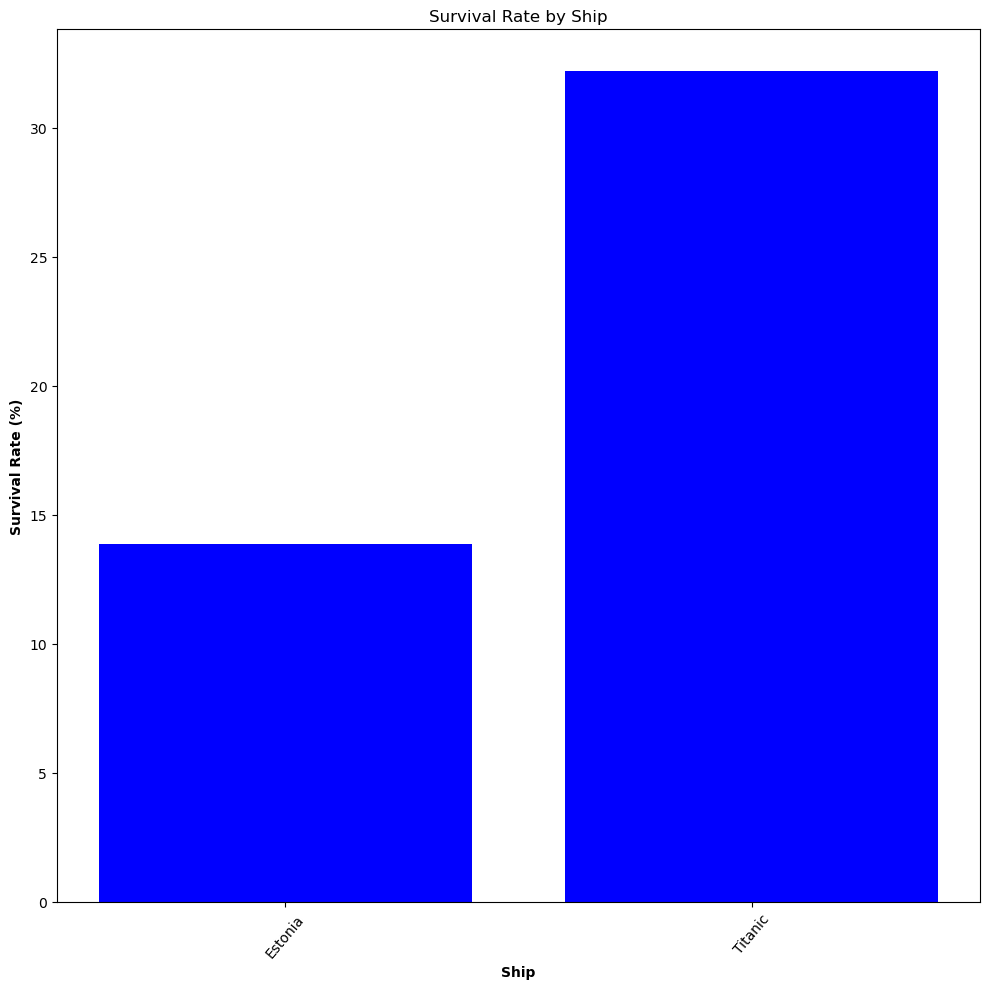

In [954]:
# Set the figure size
plt.figure(figsize=(10, 10))
# Plot the Survival Rate for each Ship and Gender
plt.bar(survival_ship['ship'], survival_ship['Survival_Rate'], color='b')

# labels and title added
plt.xlabel('Ship', fontweight='bold')
plt.ylabel('Survival Rate (%)', fontweight='bold')
plt.title('Survival Rate by Ship')

# Rotate x-axis labels
plt.xticks(rotation=50)

# Show the plot
plt.tight_layout()
plt.show()

In [831]:
survival_ship_category = Estonia_Titanic_Combined.groupby(['ship','category']).agg(
    Total_Onboard=('survived', 'count'),
    Mean_Age=('age', 'mean'),
    Total_Survived=('survived', lambda x: (x == 'yes').sum()),
    Total_Died=('survived', lambda x: (x == 'no').sum())
).reset_index()

# Survival Rate Calculation
survival_ship_category['Survival_Rate'] = survival_ship_category['Total_Survived'] / survival_ship_category['Total_Onboard']*100

survival_ship_category.sort_values(by='Total_Onboard')

,ship,category,Total_Onboard,Mean_Age,Total_Survived,Total_Died,Survival_Rate
0,Estonia,crewmember,193,33.202073,39,154,20.207254
1,Estonia,passenger,796,47.332915,98,698,12.311558
2,Titanic,crewmember,890,31.652809,211,679,23.707865
3,Titanic,passenger,1317,29.627858,500,817,37.965072


In [458]:
survival = Estonia_Titanic_Combined.groupby(['ship','category', 'survived']).agg(
    Total_Onboard=('survived', 'count'),
    Mean_Age=('age', 'mean'),
).reset_index()

survival.sort_values(by='Total_Onboard')

,ship,category,survived,Total_Onboard,Mean_Age
1,Estonia,crewmember,yes,39,32.769231
3,Estonia,passenger,yes,98,34.510204
0,Estonia,crewmember,no,154,33.311688
5,Titanic,crewmember,yes,211,31.473934
7,Titanic,passenger,yes,500,28.838167
4,Titanic,crewmember,no,679,31.708395
2,Estonia,passenger,no,698,49.133238
6,Titanic,passenger,no,817,30.111145


In [837]:
# Calculating survivability by ship and gender.
survival_ship_gender = Estonia_Titanic_Combined.groupby(['ship','gender']).agg(
    Total_Onboard=('survived', 'count'),
    Mean_Age=('age', 'mean'),
    Total_Survived=('survived', lambda x: (x == 'yes').sum()),
    Total_Died=('survived', lambda x: (x == 'no').sum())
).reset_index()

# Survival Rate Calculation
survival_ship_gender['Survival_Rate'] = survival_ship_gender['Total_Survived'] / survival_ship_gender['Total_Onboard']*100

survival_ship_gender.sort_values(by='Mean_Age')

,ship,gender,Total_Onboard,Mean_Age,Total_Survived,Total_Died,Survival_Rate
2,Titanic,female,489,29.042434,359,130,73.415133
3,Titanic,male,1718,30.843503,352,1366,20.488941
1,Estonia,male,503,43.664016,110,393,21.868787
0,Estonia,female,486,45.518519,27,459,5.555556


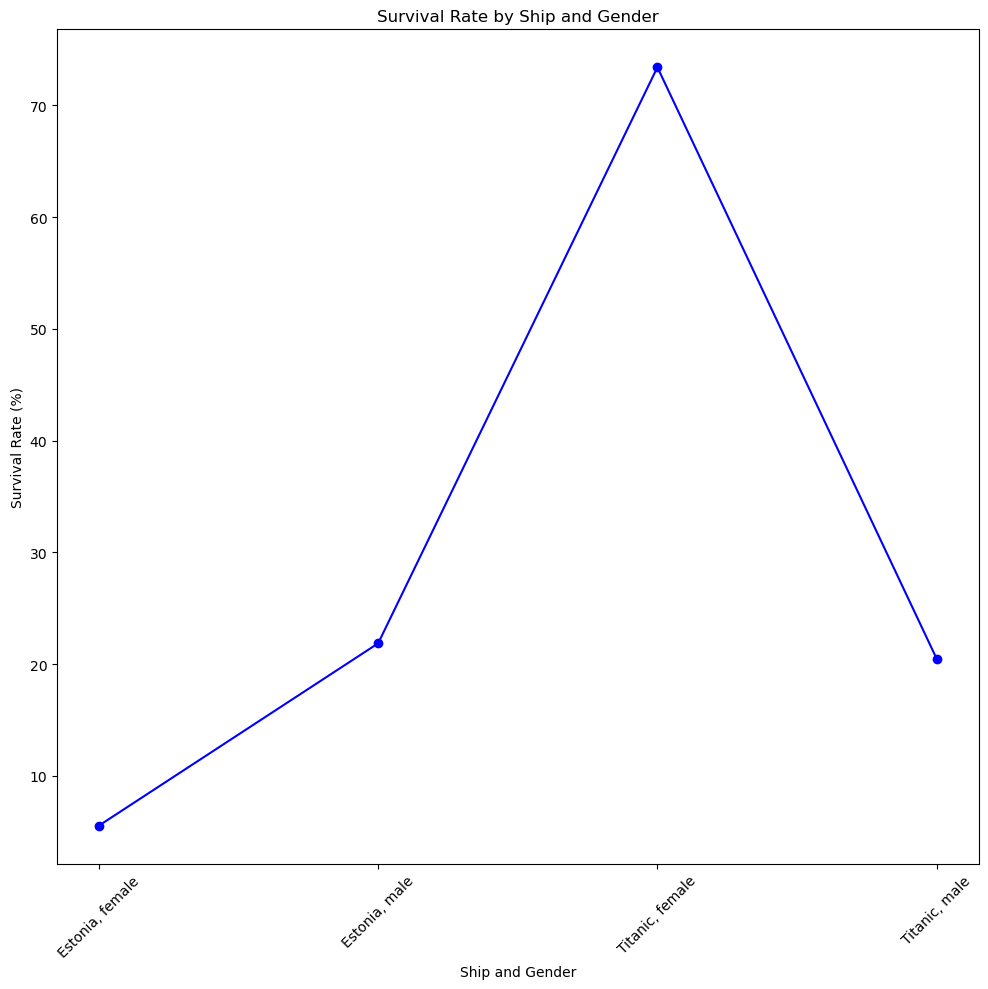

In [769]:
# Set up the figure size
plt.figure(figsize=(10, 10))

# Plot the Survival Rate for each Ship and Gender
plt.plot(survival_ship_gender['ship'] + ', ' + survival_ship_gender['gender'], survival_ship_gender['Survival_Rate'], marker='o', color='b')

# Add labels and title
plt.xlabel('Ship and Gender')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Ship and Gender')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [899]:
# Calculating survivability by ship and gender and category.
survival_ship_cat_gen = Estonia_Titanic_Combined.groupby(['ship','category','gender']).agg(
    Total_Onboard=('survived', 'count'),
    Mean_Age=('age', 'mean'),
    Total_Survived=('survived', lambda x: (x == 'yes').sum()),
    Total_Died=('survived', lambda x: (x == 'no').sum())
).reset_index()

# Survival Rate Calculation
survival_ship_cat_gen['Survival_Rate'] = survival_ship_cat_gen['Total_Survived'] / survival_ship_cat_gen['Total_Onboard']*100

survival_ship_cat_gen.sort_values(by='Survival_Rate')

,ship,category,gender,Total_Onboard,Mean_Age,Total_Survived,Total_Died,Survival_Rate
2,Estonia,passenger,female,377,49.222812,16,361,4.244032
0,Estonia,crewmember,female,109,32.706422,11,98,10.091743
7,Titanic,passenger,male,851,30.139999,161,690,18.918919
3,Estonia,passenger,male,419,45.632458,82,337,19.570406
5,Titanic,crewmember,male,867,31.534025,191,676,22.029988
1,Estonia,crewmember,male,84,33.845238,28,56,33.333333
6,Titanic,passenger,female,466,28.692597,339,127,72.746781
4,Titanic,crewmember,female,23,36.130435,20,3,86.956522


#### The 4-7 questions are calculated here with the cleaned Titanic Passenger Dataset instead of the combined Estonia and Titanic cleaned dataset.

In [611]:
df_cleaned_titanic.head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,Yes,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,"St Louis, MO"


In [615]:
titanic_passengers = df_cleaned_titanic.groupby(['pclass']).agg(
    Mean_Age=('age', 'mean'),
).reset_index()

titanic_passengers.sort_values(by='Mean_Age')

,pclass,Mean_Age
2,3,26.302223
1,2,29.528333
0,1,38.039569


In [631]:
titanic_passengers = df_cleaned_titanic.groupby(['pclass','sex']).agg(
    Mean_Age=('age', 'mean'),
    Passenger_Count=('sex', 'count'),
    Mean_Fare=('fare', 'mean')
).reset_index()

titanic_passengers.sort_values(by='Mean_Age')

,pclass,sex,Mean_Age,Passenger_Count,Mean_Fare
4,3,female,24.465552,216,15.324250
5,3,male,27.106930,493,12.457815
2,2,female,27.566605,106,23.234827
3,2,male,30.744375,171,19.904946
0,1,female,36.490920,144,109.412385
1,1,male,39.285410,179,69.888385


In [619]:
gender_by_class = calculations(df_cleaned_titanic.groupby('pclass')['sex'])
print(gender_by_class)

               Count Percentage
pclass sex                     
1      male      179     55.42%
       female    144     44.58%
2      male      171     61.73%
       female    106     38.27%
3      male      493     69.53%
       female    216     30.47%


In [635]:
survive_by_class = calculations(df_cleaned_titanic.groupby('pclass')['survived'])
print(survive_by_class)

                 Count Percentage
pclass survived                  
1      Yes         200     61.92%
       No          123     38.08%
2      No          158     57.04%
       Yes         119     42.96%
3      No          528     74.47%
       Yes         181     25.53%


In [637]:
survive_by_gender = calculations(df_cleaned_titanic.groupby('sex')['survived'])
print(survive_by_gender)

                 Count Percentage
sex    survived                  
female Yes         339     72.75%
       No          127     27.25%
male   No          682     80.90%
       Yes         161     19.10%


In [643]:
survive_gender_class = calculations(df_cleaned_titanic.groupby(['pclass', 'sex'])['survived'])
print(survive_gender_class)

                        Count Percentage
pclass sex    survived                  
1      female Yes         139     96.53%
              No            5      3.47%
       male   No          118     65.92%
              Yes          61     34.08%
2      female Yes          94     88.68%
              No           12     11.32%
       male   No          146     85.38%
              Yes          25     14.62%
3      female No          110     50.93%
              Yes         106     49.07%
       male   No          418     84.79%
              Yes          75     15.21%


**The females in each class had a much greater survival rate at 96.53% for first class and 88.68% for second class, but had a dramatically lower chance of survival at 49.07% for third class.** 

In [779]:
survive_gender_class2 = df_cleaned_titanic.groupby(['pclass','sex']).agg(
    Mean_Age=('age', 'mean'),
    Mean_Fare=('fare','mean'),
    Total_Onboard=('survived', 'count'),
    Total_Survived=('survived', lambda x: (x == 'Yes').sum()),
    Total_Died=('survived', lambda x: (x == 'No').sum())
).reset_index()

# Survival Rate Calculation
survive_gender_class2['Survival_Rate'] = survive_gender_class2['Total_Survived'] / survive_gender_class2['Total_Onboard']*100

survive_gender_class2.sort_values(by='Survival_Rate')

,pclass,sex,Mean_Age,Mean_Fare,Total_Onboard,Total_Survived,Total_Died,Survival_Rate
3,2,male,30.744375,19.904946,171,25,146,14.619883
5,3,male,27.106930,12.457815,493,75,418,15.212982
1,1,male,39.285410,69.888385,179,61,118,34.078212
4,3,female,24.465552,15.324250,216,106,110,49.074074
2,2,female,27.566605,23.234827,106,94,12,88.679245
0,1,female,36.490920,109.412385,144,139,5,96.527778


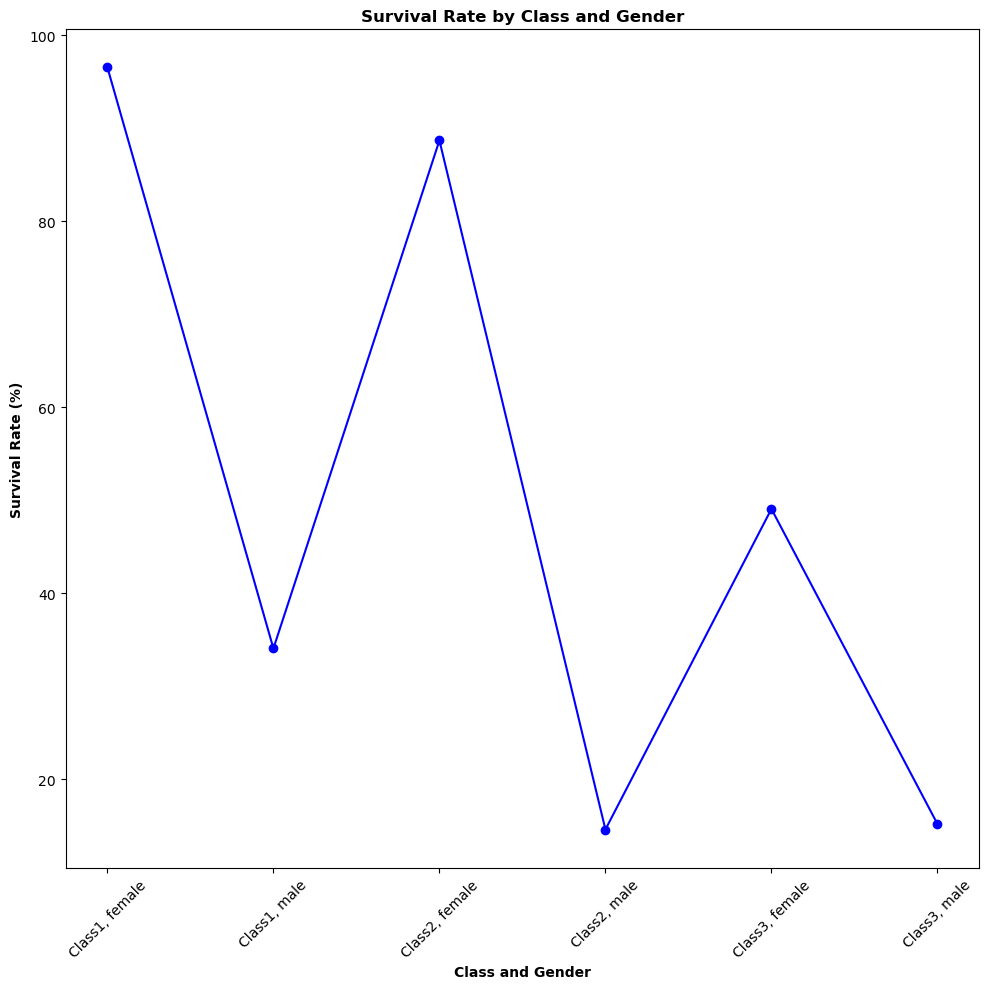

In [959]:
survive_gender_class2['pclass'] = survive_gender_class2['pclass'].astype(str)

# Set up the figure size
plt.figure(figsize=(10, 10))

# Plot the Survival Rate for each Ship and Gender
plt.plot('Class' + survival_class_gender['pclass'] + ', ' + survival_class_gender['sex'], survival_class_gender['Survival_Rate'], marker='o', color='b')

# Add labels and title
plt.xlabel('Class and Gender', fontweight='bold')
plt.ylabel('Survival Rate (%)', fontweight='bold')
plt.title('Survival Rate by Class and Gender', fontweight='bold')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [691]:
survival_titanic = df_cleaned_titanic.groupby(['pclass']).agg(
    Mean_Age=('age', 'mean'),
    Mean_Fare=('fare','mean'),
    Total_Onboard=('survived', 'count'),
    Total_Survived=('survived', lambda x: (x == 'Yes').sum()),
    Total_Died=('survived', lambda x: (x == 'No').sum())
).reset_index()

# Survival Rate Calculation
survival_titanic['Survival_Rate'] = survival_titanic['Total_Survived'] / survival_titanic['Total_Onboard']*100

survival_titanic.sort_values(by='Survival_Rate')

,pclass,Mean_Age,Mean_Fare,Total_Onboard,Total_Survived,Total_Died,Survival_Rate
2,3,26.302223,13.331087,709,181,528,25.528914
1,2,29.528333,21.179196,277,119,158,42.960289
0,1,38.039569,87.508992,323,200,123,61.919505


In [990]:
df_under_18 = df_cleaned_titanic[df_cleaned_titanic['age'] < 18]

# Perform the same aggregation on the filtered dataset
under_18_survival = df_under_18.groupby(['pclass']).agg(
    Mean_Age=('age', 'mean'),
    Mean_Fare=('fare', 'mean'),
    Total_Onboard=('survived', 'count'),
    Total_Survived=('survived', lambda x: (x == 'Yes').sum()),
    Total_Died=('survived', lambda x: (x == 'No').sum())
).reset_index()

# Calculate Survival Rate
under_18_survival['Survival_Rate'] = (under_18_survival['Total_Survived'] / 
                                      under_18_survival['Total_Onboard']) * 100

# Sort by Survival Rate
under_18_survival.sort_values(by='Survival_Rate', ascending=False)

# Display the result
under_18_survival

,pclass,Mean_Age,Mean_Fare,Total_Onboard,Total_Survived,Total_Died,Survival_Rate
0,1,12.127780,116.062220,15,13,2,86.666667
1,2,7.340909,29.704042,33,29,4,87.878788
2,3,9.221698,20.204953,106,39,67,36.792453


In [988]:
df_under_13 = df_cleaned_titanic[df_cleaned_titanic['age'] < 13]

# Perform the same aggregation on the filtered dataset
under_13_survival = df_under_13.groupby(['pclass']).agg(
    Mean_Age=('age', 'mean'),
    Mean_Fare=('fare', 'mean'),
    Total_Onboard=('survived', 'count'),
    Total_Survived=('survived', lambda x: (x == 'Yes').sum()),
    Total_Died=('survived', lambda x: (x == 'No').sum())
).reset_index()

# Calculating the Survival Rate
under_13_survival['Survival_Rate'] = (under_13_survival['Total_Survived'] / 
                                      under_13_survival['Total_Onboard']) * 100

# Sorting
under_13_survival.sort_values(by='Survival_Rate', ascending=False)

under_13_survival

,pclass,Mean_Age,Mean_Fare,Total_Onboard,Total_Survived,Total_Died,Survival_Rate
0,1,4.783340,127.891660,5,4,1,80.0
1,2,4.302083,28.923442,24,24,0,100.0
2,3,5.146154,23.005125,65,26,39,40.0


In [992]:
df_over_60 = df_cleaned_titanic[df_cleaned_titanic['age'] >= 60]

# Perform the same aggregation on the filtered dataset
over_60_survival = df_over_60.groupby(['sex']).agg(
    Mean_Age=('age', 'mean'),
    Mean_Fare=('fare', 'mean'),
    Total_Onboard=('survived', 'count'),
    Total_Survived=('survived', lambda x: (x == 'Yes').sum()),
    Total_Died=('survived', lambda x: (x == 'No').sum())
).reset_index()

# Calculating the Survival Rate
over_60_survival['Survival_Rate'] = (over_60_survival['Total_Survived'] / 
                                      over_60_survival['Total_Onboard']) * 100

# Sorting
over_60_survival.sort_values(by='Survival_Rate', ascending=False)

over_60_survival

,sex,Mean_Age,Mean_Fare,Total_Onboard,Total_Survived,Total_Died,Survival_Rate
0,female,63.181818,92.584091,11,9,2,81.818182
1,male,64.931034,52.693382,29,3,26,10.344828


### From the Estonia and Titanic Subset Combined Dataset
**Based on the detailed survivability analysis from the code above the following assertions can be made:**

1. Which crash was considered to be worse based on the survivability analysis. **The Survivability Rate of the Titanic (32.21%) was better than the Estonia Survivability Rate (13.85%). A person had a better chance of survival on the Titanic compared to the Estonia Ship. Before completing the analysis, I assumed that the Estonia had a better survival rate just because the Estonia was a recent wreck compared to the Titanic which sunk in the Atlantic Ocean compared to the Estonia.**

2.  What was the mean age and gender for survival and death for each ship:
**Females had a 73.41% chance of survival on the Titanic (mean age is 29) and only 5.55% on the Estonia (mean age is 45). Males only had a 20.49% chance of survival on the Titanic (mean age is 31 rounded up) and only 21.86% chance of survival on the Estonia (mean age is 44 rounded up.**

In [889]:
# Calculation for the mean age and gender for survival and death for each ship:
survival_ship_gender.sort_values(by='Mean_Age')

,ship,gender,Total_Onboard,Mean_Age,Total_Survived,Total_Died,Survival_Rate
2,Titanic,female,489,29.042434,359,130,73.415133
3,Titanic,male,1718,30.843503,352,1366,20.488941
1,Estonia,male,503,43.664016,110,393,21.868787
0,Estonia,female,486,45.518519,27,459,5.555556


3.  Which ship had a better survival rate (broken down by passengers, crew, and both passengers & crew together):

**The Titanic had a much better survival rate compared to the Estonia, especially for female passengers and crewmembers as seen in the results below. However, the female passengers and crewmembers on the Estonia had the lowest chance of survival of any group.**

In [903]:
survival_ship_cat_gen.sort_values(by='Survival_Rate')

,ship,category,gender,Total_Onboard,Mean_Age,Total_Survived,Total_Died,Survival_Rate
2,Estonia,passenger,female,377,49.222812,16,361,4.244032
0,Estonia,crewmember,female,109,32.706422,11,98,10.091743
7,Titanic,passenger,male,851,30.139999,161,690,18.918919
3,Estonia,passenger,male,419,45.632458,82,337,19.570406
5,Titanic,crewmember,male,867,31.534025,191,676,22.029988
1,Estonia,crewmember,male,84,33.845238,28,56,33.333333
6,Titanic,passenger,female,466,28.692597,339,127,72.746781
4,Titanic,crewmember,female,23,36.130435,20,3,86.956522


4. I will examine my survival rate for each ship, and determine which ship I had a greater chance of survival: -

**After examining the survivability for a male on the Estonia and the Titanic, I would have had a slightly greater chance of survival on the Estonia. The Estonia had a 21.86% survival rate for males, while the Titanic had a 20.49% survival rate for males.**

### From the Titanic passenger cleaned dataset:

5. Did the wealthier passengers on the Titanic have a better chance of survival than the regular passengers and the crew members. -

**Yes, the passengers in first class had a better survival rate with a rate of 61.92% that survived and 38.08% that died. The male and female survival breakdown for 1st class was 34.09% for males & 96.5% for females. So it is true that a person in first class had a better chance of surival compared to second and third class.**

6. Was it true that the women and children took priority for the lifeboats?

**Yes, based on the survivability calculations, 72.75% of all of the females survived the Titanic. People younger than 18 (broken down by passenger class): first and second class around an 87% chance of survival, while third class had a 36.79% of survival. Children younger than 13 (broken down by passenger class): first class had an 80% chance of survival, second class had 100%, and third class had 40% chance of survival. So yes, it is true that there was priority for females and children to get on the lifeboats. However, the first and second class passengers of this group had a much greater survival rate than the third class passengers of this group.** 

In [983]:
under_18_survival

,pclass,Mean_Age,Mean_Fare,Total_Onboard,Total_Survived,Total_Died,Survival_Rate
0,1,13.805557,120.594443,21,18,3,85.714286
1,2,9.625000,29.112700,42,31,11,73.809524
2,3,10.842308,18.489232,130,46,84,35.384615


In [985]:
under_13_survival

,pclass,Mean_Age,Mean_Fare,Total_Onboard,Total_Survived,Total_Died,Survival_Rate
0,1,6.152783,150.305550,6,5,1,83.333333
1,2,4.650000,28.546504,25,25,0,100.000000
2,3,5.492647,22.855879,68,27,41,39.705882


7. What was the breakdown of the elderly by gender that survived?

**Elderly females had a significantly higher chance of survival compared to elderly males over 60. Though, we should factor that there were 11 females 60 and over, while there were 29 males 60 and over.**

In [994]:
over_60_survival

,sex,Mean_Age,Mean_Fare,Total_Onboard,Total_Survived,Total_Died,Survival_Rate
0,female,63.181818,92.584091,11,9,2,81.818182
1,male,64.931034,52.693382,29,3,26,10.344828


### Final Thoughts Reflection: 
**The most important information to be learned is that females had a significantly better chance of survival on the Titanic than on the Estonia. I think what happened on the Estonia was that the wreck was so sudden there wasn't a chance to get all of the females on any lifeboats. I am also not sure if there were many lifeboats on the Estonia and if most of the survivors survived floating in the water instead of getting on a lifeboat. Maybe with the Titanic being so large, it sunk more slowly and allowed more time to get all of the females off the Titanic. The Titanic also probably had more lifeboats which allowed for a better chance of survival for females compared to the Estonia ship as well.**

**The wealthier passengers in first class also had a greater chance of survival compared to second class and third class passengers. People under 18 and children under 13 had a much greater chance of survival as well compared to the same group in third class. Lastly, elderly females onboard had a significantly high chance of survival at 85.71% compared to elderly males 60 and over.**